## Includes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import glob

# Latex results

In [2]:
results = [pd.read_csv(path) for path in glob.glob("../logs/*csv")]
results = pd.concat(results)
# Clean dataframe
results = results.apply(lambda x: x.apply(lambda y: y.split(' ')[1][:-1]))
results

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,val_f1,val_prec,val_reca,val_roc,pytorch_total_params,train_time,best_epoch,experiment_id,train_samples,val_samples
0,'wav','CNN',256,0.25,32,0.0005,0.25,0.0,'relu',2,...,0.8522854690426398,0.872042692918295,0.8603125,0.9867886088709676,16677,3358.1363031864166,1109,'28','349,'342
1,'wav','CNN',256,0.25,32,0.0005,0.25,0.0,'relu',2,...,0.8322322273253404,0.8401366979143605,0.84375,0.983835181451613,16677,1589.5292069911957,437,'1168','151,'271
2,'wav','CNN',256,0.25,32,0.0005,0.25,0.0,'relu',2,...,0.7709894893373543,0.7875152875678328,0.776875,0.982107258064516,16677,2573.179792165756,776,'2308','855,'858
3,'wav','CNN',256,0.25,32,0.0005,0.25,0.0,'relu',2,...,0.8682450705841627,0.8704146612839095,0.8771875,0.9934779233870967,16677,1182.5789799690247,363,'3448','416,'762
4,'wav','CNN',256,0.25,32,0.0005,0.25,0.0,'relu',2,...,0.8561750756522502,0.8602070431385651,0.8678125000000001,0.98903125,16677,3261.1691002845764,1057,'4588','88,'469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,'raw','CNN',128,0.5,32,0.0005,0.25,0.0,'relu',2,...,0.27963438316453837,0.3813149285106948,0.251875,0.6156347782258065,8417,2006.3740091323853,572,'6563','156,'230
6,'raw','CNN',128,0.5,32,0.0005,0.25,0.0,'relu',2,...,0.27749503224576694,0.3898024719547163,0.2578125,0.6127298387096773,8417,1397.7262737751007,352,'8843','373,'281
7,'raw','CNN',128,0.5,32,0.0005,0.25,0.0,'relu',2,...,0.307950082333493,0.4474532603764968,0.29500000000000004,0.6686327620967742,8417,1193.5467810630798,290,'9983','252,'364
8,'raw','CNN',128,0.5,32,0.0005,0.25,0.0,'relu',2,...,0.23761364063347176,0.3403170651814279,0.22093749999999998,0.6038013104838711,8417,1500.0500242710114,396,'11123','27,'298


In [3]:
model_names = ['GraphConv','MLP','LR','CNN']
hidden_channels = [512, 1024]
models = list(filter(None, [f'{name}_{hc}' if not name == 'LR' else None if hc != 64 else 'LR' for name in model_names for hc in hidden_channels ]))
features = ['raw']
window_sizes = [0.5, 1]
number_train_samples = [16, 32, 64, 128, 256, 512]

In [4]:
sorted_by_time_nts_ws = np.array([ws*nts for ws in window_sizes for nts in number_train_samples])
b = np.array([ws for ws in window_sizes for nts in number_train_samples])
c = np.array([nts for ws in window_sizes for nts in number_train_samples])
idx = np.argsort(sorted_by_time_nts_ws)
sorted_by_time_nts_ws.sort()
sorted_ws = b[idx]
sorted_nts = c[idx]

In [5]:
dfs = []

for ef in features:
    print(ef)
    df = pd.DataFrame(index=models)
    for (ws,nts) in zip(sorted_ws, sorted_nts):
        res_col = []
        for model in models:
            if model == 'LR':
                hc = 0
            else:
                model, hc = model.split('_')
                hc = int(hc)
            res = results[(results['model'] == f'\'{model}\'') & (results['hidden_channels'].astype(int)==hc) & (results['window_size'].astype(float) == ws) & (results['number_train_samples'].astype(int)==nts) & (results['eeg_feature'] == f'\'{ef}\'')]
            mean_acc = res['test_acc'].astype(float).mean()
            std_acc = res['test_acc'].astype(float).std()

            res_col.append(f'{mean_acc:.2f}±{std_acc:.2f}')
        df[f'{ef} {ws}s x{nts}'] = res_col  
    dfs.append(df)

raw


In [6]:
raw_df = dfs[0]

# Inflection points

In [7]:
lr_res = raw_df.iloc[0]
lr_res

raw 0.5s x16     0.68±0.01
raw 0.5s x32     0.85±0.01
raw 1.0s x16     0.67±0.01
raw 0.5s x64     0.95±0.00
raw 1.0s x32     0.86±0.01
raw 0.5s x128    0.98±0.00
raw 1.0s x64     0.95±0.01
raw 0.5s x256    0.99±0.00
raw 1.0s x128    0.98±0.01
raw 0.5s x512    1.00±0.00
raw 1.0s x256    0.99±0.01
raw 1.0s x512    0.99±0.01
Name: GraphConv_512, dtype: object

## Option 1) Show all values

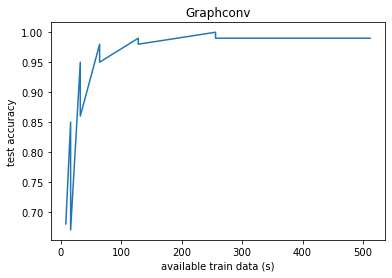

In [8]:
lr_means = np.array([float(x.split('±')[0]) for x in lr_res.to_numpy()])
lr_stds = np.array([float(x.split('±')[1]) for x in lr_res.to_numpy()])
plt.plot(sorted_by_time_nts_ws,lr_means)
plt.title('Graphconv')
plt.xlabel('available train data (s)')
plt.ylabel('test accuracy')
plt.show()

## Option 2) Merge values for x
https://www.researchgate.net/post/How_do_I_combine_mean_and_standard_deviation_of_two_groups

In [9]:
u_sorted_by_time_nts_ws = np.unique(sorted_by_time_nts_ws)
u_sorted_by_time_nts_ws

array([  8.,  16.,  32.,  64., 128., 256., 512.])

In [10]:
merged_lr_res = []
for t in u_sorted_by_time_nts_ws:
    lr_res_time = lr_res[sorted_by_time_nts_ws==t]
    means = np.array([float(x.split('±')[0]) for x in lr_res_time.to_numpy()])
    stds = np.array([float(x.split('±')[1]) for x in lr_res_time.to_numpy()])
    merged_lr_res.append(f'{means.mean():.2f}±{stds.mean():.2f}')
merged_lr_res = pd.Series(data=merged_lr_res, index=u_sorted_by_time_nts_ws)
merged_lr_res

8.0      0.68±0.01
16.0     0.76±0.01
32.0     0.91±0.01
64.0     0.96±0.01
128.0    0.98±0.01
256.0    0.99±0.01
512.0    0.99±0.01
dtype: object

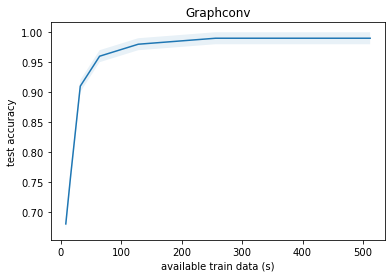

In [11]:
lr_means = np.array([float(x.split('±')[0]) for x in merged_lr_res.to_numpy()])
lr_stds = np.array([float(x.split('±')[1]) for x in merged_lr_res.to_numpy()])
plt.plot(u_sorted_by_time_nts_ws,lr_means)
plt.fill_between(u_sorted_by_time_nts_ws,lr_means-lr_stds,lr_means+lr_stds,alpha=.1)
plt.title('Graphconv')
plt.xlabel('available train data (s)')
plt.ylabel('test accuracy')
plt.show()

# Create merged dfs

In [12]:
merged_dfs = []
for i,df in enumerate(dfs):
    merged_df_rows = []
    for row_id in range(len(df)):
        row_res = df.iloc[row_id]
        merged_row_res = []
        for t in u_sorted_by_time_nts_ws:
            raw_res_time = row_res[sorted_by_time_nts_ws==t]
            means = np.array([float(x.split('±')[0]) for x in raw_res_time.to_numpy()])
            stds = np.array([float(x.split('±')[1]) for x in raw_res_time.to_numpy()])
            merged_row_res.append(f'{means.mean():.2f}±{stds.mean():.2f}')
        # merged_row_res = pd.Series(data=merged_row_res, index=u_sorted_by_time_nts_ws)
        merged_df_rows.append(merged_row_res)
    merged_dfs.append(pd.DataFrame(merged_df_rows,index=models,columns=[f'{features[i]} {t} s.' for t in u_sorted_by_time_nts_ws]))

In [13]:
merged_raw_df= merged_dfs[0]

In [14]:
merged_raw_df

,raw 8.0 s.,raw 16.0 s.,raw 32.0 s.,raw 64.0 s.,raw 128.0 s.,raw 256.0 s.,raw 512.0 s.
GraphConv_512,0.68±0.01,0.76±0.01,0.91±0.01,0.96±0.01,0.98±0.01,0.99±0.01,0.99±0.01
GraphConv_1024,0.67±0.02,0.76±0.01,0.90±0.01,0.96±0.01,0.98±0.01,0.98±0.02,0.98±0.02
MLP_512,0.40±0.02,0.42±0.01,0.51±0.01,0.62±0.01,0.75±0.01,0.86±0.01,0.89±0.01
MLP_1024,0.42±0.01,0.44±0.01,0.51±0.03,0.61±0.01,0.74±0.00,0.85±0.01,0.87±0.01
CNN_512,0.46±0.03,0.58±0.03,0.72±0.03,0.84±0.03,0.90±0.01,0.93±0.01,0.94±0.01
CNN_1024,0.48±0.03,0.58±0.04,0.74±0.04,0.84±0.03,0.91±0.01,0.93±0.01,0.94±0.02


# Create latex tables for merged results

In [15]:
for i,f in enumerate(features):
    text_file = open(f'tables/{f}_table_res_merged.tex', "w")
    n = text_file.write(merged_dfs[i].to_latex(bold_rows=True))
    text_file.close()

In [16]:
models[0]

'GraphConv_512'

In [17]:
u_sorted_by_time_nts_ws,sorted_by_time_nts_ws

(array([  8.,  16.,  32.,  64., 128., 256., 512.]),
 array([  8.,  16.,  16.,  32.,  32.,  64.,  64., 128., 128., 256., 256.,
        512.]))

In [18]:
df.shape[1], len(sorted_by_time_nts_ws)

(12, 12)

# Plot both options side by side

[  8.  16.  32.  64. 128. 256. 512.]


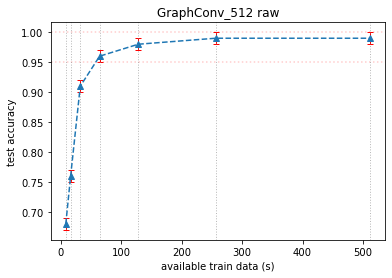

[  8.  16.  32.  64. 128. 256. 512.]


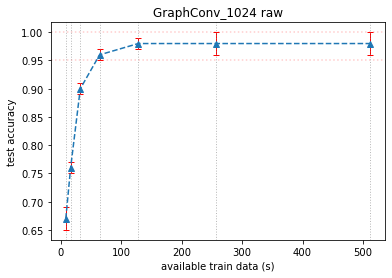

In [19]:
def show_inflection_point_graph(model_name, df, title):
    model_idx = np.where(df.index.to_numpy()==model_name)[0][0]
    res = df.iloc[model_idx]
    means = np.array([float(x.split('±')[0]) for x in res.to_numpy()])
    stds = np.array([float(x.split('±')[1]) for x in res.to_numpy()])
    x_axis = u_sorted_by_time_nts_ws if df.shape[1] == len(u_sorted_by_time_nts_ws) else sorted_by_time_nts_ws
    print(x_axis)
   
    plt.errorbar(x_axis, means, stds, linestyle='--', marker='^',ecolor='red',elinewidth=1,capsize=3)
    plt.axhline(1, color='red',alpha=0.2,linestyle=':')
    plt.axhline(.95, color='red',alpha=0.2,linestyle=':')
#     plt.xticks(list(range(n_secs)))
    n_secs = int(x_axis.max()+1)
    for i in np.arange(0,n_secs,0.25):
#         if int(i) == i:
#             plt.axvline(i, color='gray',alpha=0.25,linestyle=':')
        if i in x_axis:
            plt.axvline(i, color='gray',alpha=0.55,linestyle=':',linewidth=1)
    
    plt.title(f'{title}')
    plt.xlabel('available train data (s)')
    plt.ylabel('test accuracy')

show_inflection_point_graph(models[0], merged_raw_df, f'{models[0]} raw')
plt.show()
show_inflection_point_graph(models[1], merged_raw_df, f'{models[1]} raw')
plt.show()

In [20]:
%%capture
from matplotlib.pyplot import figure
for i, (df,merged_df) in enumerate(zip(dfs,merged_dfs)):
    for model in models:
        figure(figsize=(20, 6), dpi=80)
        plt.subplot(1, 2, 1)
        show_inflection_point_graph(model, df, f'{model}({features[i]})')
        plt.subplot(1, 2, 2)
        show_inflection_point_graph(model, merged_df, f'{model} ({features[i]}) merged')
        plt.savefig(f'figures/{features[i]}_{model}.png')